<a href="https://colab.research.google.com/github/AYMAN-CHAREF/machine-learning-et-deep-learning/blob/main/Exemple_Regression_lin%C3%A9aire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemple Regression linéaire

## Création de la base de données

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
X,Y = make_regression(n_samples=100,n_features=1,noise=10)

In [3]:
Y

array([ 30.94784746, -31.98557752, -33.77735504,  33.79180282,
        26.76213908, -29.23305611,  30.70873553, -21.49215434,
       -11.30347207,  -4.60405126,  37.91127591, -20.70304781,
         3.5313321 ,  61.44992074, -36.97938442,  16.23349995,
       -77.12713679, -24.80934934,  -5.58375008,  14.38085741,
       -22.11095452,  -3.2495079 ,  -7.73150472, -23.38120689,
       -13.91564081, -19.12982062,  19.04961317, -35.4568143 ,
       -14.22309672,  -6.8729471 ,  10.60527914,  55.06005116,
        36.4649484 ,  30.92774144,  22.75094501,  27.11302291,
        29.55116076,  -5.17829917, -23.64680948,  10.13143381,
         3.10375477,  31.33650551,  63.89883032,  -6.51866318,
       -11.42118391,  33.59885956,   4.15737634,  30.482088  ,
       -20.73659809,  44.74263134, -10.7474452 ,   4.81187633,
        25.97872745,   8.35539424, -10.23508895, -42.54279131,
        -7.36354565, -55.25172533,   3.75798912,  73.36387171,
         4.56835408, -63.53712255,  31.47646535,  28.07

In [4]:
X.shape, Y.shape

((100, 1), (100,))

In [ ]:
Y=Y.reshape(-1,1)

In [ ]:
Y.shape

(100, 1)

In [5]:
Y=Y.reshape(-1,1) # Y.reshape(100,1) Y.reshape(Y.shape[0],1)
Y.shape

(100, 1)

<ipython-input-6-f9010b868e12>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


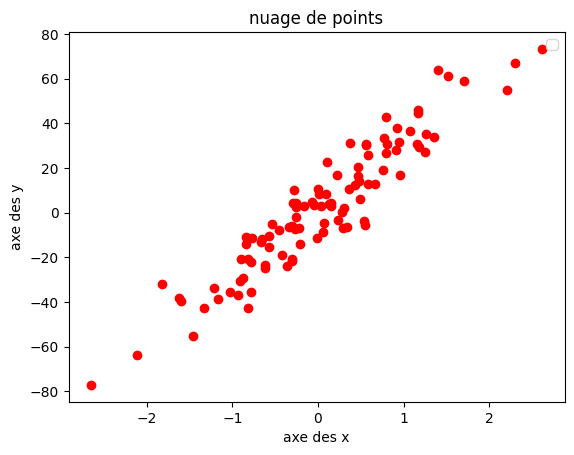

In [6]:
plt.scatter(X,Y,color='red')
plt.title("nuage de points")
plt.xlabel("axe des x")
plt.ylabel("axe des y")
plt.legend()
plt.show()

# Répartition de la base données

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40,shuffle=True)

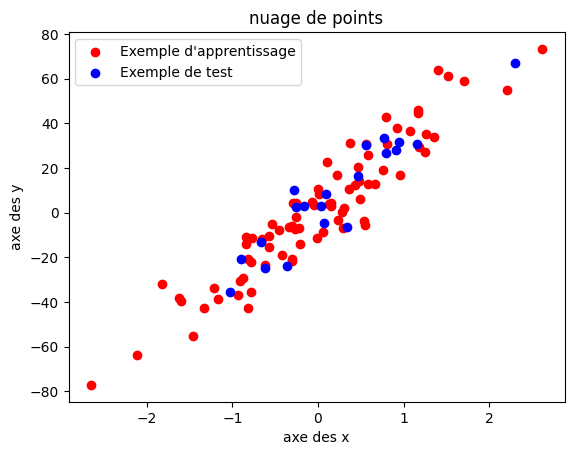

In [8]:
plt.scatter(X_train,Y_train, c='red',label="Exemple d'apprentissage")
plt.scatter(X_test,Y_test, c='blue',label="Exemple de test")
plt.legend()
plt.title("nuage de points")
plt.xlabel("axe des x")
plt.ylabel("axe des y")
plt.show()

In [11]:
def model_lineaire_Scalaire(X,Beta):
  return X*Beta[0]+ Beta[1]

In [12]:
def model_lineaire_Matricielle(X,Beta):
  I= np.ones((X.shapes[0,1]))

  X_a= np.hastack((X,I))
  return np.dot(X_a,Beta)


In [13]:
def fonction_Cout_Notation_Scalaire(Y,X,Beta):
  return np.sum((Y-model_lineaire(X,Beta))**2)/len(Y)

In [14]:
def fonction_Cout_Notation_Matricielle(Y,X,Beta):
  term1 = Y-model_lineaire(X,Beta)
  n=len(Y)
  return term1.T.dot(term1)/n

# Métode des moindre carrés pour estimer les parametres du modele (vecteur Beta)

In [15]:
def moindres_carres(X,Y):
  X_mean=np.mean(X)
  Y_mean=np.mean(Y)
  beta1=np.sum((X-X_mean)*(Y-Y_mean))/np.sum((X-X_mean)**2)
  beta0=Y_mean-X_mean
  return np.array([beta1,beta0])

In [16]:
Beta=moindres_carres(X_train,Y_train)
Beta.reshape

<function ndarray.reshape>

In [19]:
x_min=np.min(X_train)
x_max=np.max(X_train)
points=np.linspace(x_min,x_max,10)

y_pred=model_lineaire_Scalaire(points,Beta)

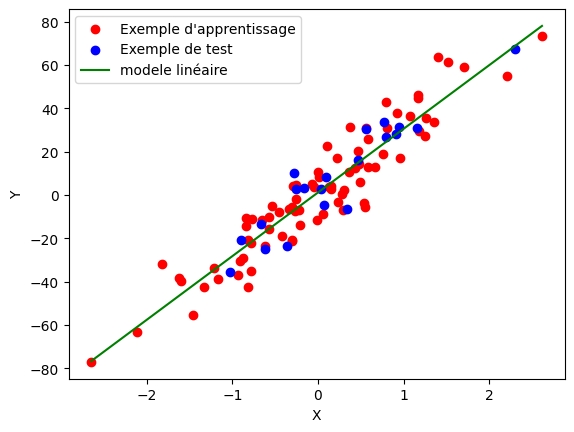

In [20]:
plt.scatter(X_train,Y_train, c='r',label="Exemple d'apprentissage")
plt.scatter(X_test,Y_test, c='b',label="Exemple de test")
plt.plot(points,y_pred,color='green',label="modele linéaire")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()